In [1]:
import numpy as np 
import pylab as plt

In [2]:
data = np.loadtxt("tsnet-scores-watts.txt")
data.shape
x = [i for i in range(10,201,10)]

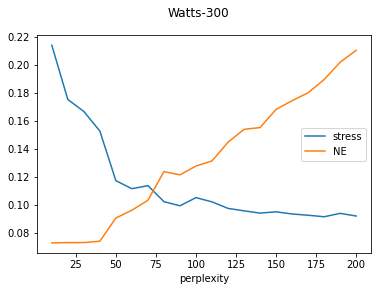

In [3]:
plt.plot(x,data[:,1],label="stress")
plt.plot(x,1- data[:,0],label="NE")

plt.xlabel("perplexity")
plt.suptitle("Watts-300")
plt.legend()

plt.savefig("figures/perp-test-watts.png")

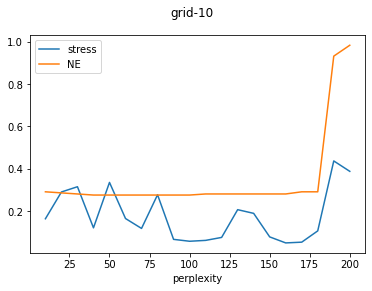

In [4]:
data = np.loadtxt("tsnet-scores-grid.txt")
plt.plot(x,data[:,1],label="stress")
plt.plot(x,1- data[:,0],label="NE")

plt.xlabel("perplexity")
plt.suptitle("grid-10")
plt.legend()

plt.savefig("figures/perp-test-grid.png")

ValueError: x and y must have same first dimension, but have shapes (20,) and (19,)

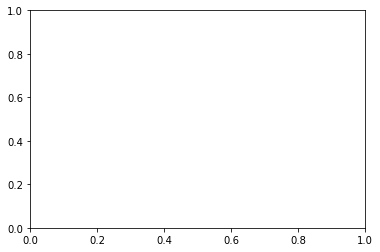

In [5]:
data = np.loadtxt("tsnet-scores-blocks.txt")
plt.plot(x,data[:,1],label="stress")
plt.plot(x,1- data[:,0],label="NE")

plt.xlabel("perplexity")
plt.suptitle("block-400")
plt.legend()

plt.savefig("figures/perp-test-block.png")

In [7]:
import pickle 
with open("Updated_plots.pkl", 'rb') as f:
    data = pickle.load(f)

In [ ]:
x = np.linspace(22,100,8)
for title in data.keys():
    scores = data[title]
    NP = 1-scores['NP']
    stress = scores['stress']

    fig,ax = plt.subplots()

    ax.plot(x,stress,'o-',label="stress")
    ax.plot(x,NP,'o-',label="NP")
    plt.xlabel("k")
    fig.suptitle(f"{title}")
    ax.legend()

    plt.savefig(f"figures/new_summed_curve/{title}.png")
    plt.clf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
title = 'block_2000'

scores = data[title]
NP = 1-scores['NP']
stress = scores['stress']
x = np.linspace(22,100,8)

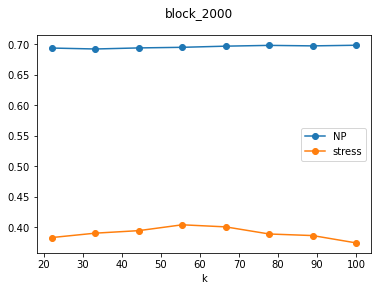

In [ ]:
plt.plot(x,NP,'o-',label="NP")
plt.plot(x,stress,'o-',label="stress")
plt.xlabel("k")
plt.suptitle(f"{title}")
plt.legend()

In [26]:

fileObj = open('02_21_test.pkl', 'rb')
embeds = pickle.load(fileObj)
fileObj.close()


In [9]:
for embed in embeds:
    for graph in embeds[embed]:
        if embeds[embed][graph]["NE"] is None: continue
        NE = embeds[embed][graph]["NE"]
        stress = embeds[embed][graph]["stress"]  
        x = [i for i in range(len(stress))]

        plt.plot(x,stress,'-o',label="stress")
        plt.plot(x,NE,'-o',label="NE")
        plt.legend()
        plt.suptitle(f"{embed} method; graph: {graph}")      
        plt.savefig(f"figures/repulse_exp/{embed}_{graph}.png")
        plt.clf()

<Figure size 432x288 with 0 Axes>

In [10]:
for embed in embeds:
    print(embed)

transformation
all_pairs_log
comp_pairs_log
all_pairs_no_log
comp_pairs_no_log
tsne
mds


In [11]:
for embed in embeds:
    if embed == "mds" or embed == "tsne": continue
    for graph in embeds[embed]:
        if embeds[embed][graph]["NE"] is None: continue
        NE = embeds[embed][graph]["NE"]
        stress = embeds[embed][graph]["stress"]  
        x = [i for i in range(len(stress))]

        mdsavg = (embeds["mds"][graph]["stress"] + embeds["mds"][graph]["NE"]) / 2
        tsneavg = (embeds["tsne"][graph]["stress"] + embeds["tsne"][graph]["NE"]) / 2

        plt.plot(x,(stress + NE) / 2,'-o',label="L2G average")
        plt.plot(x,mdsavg, '-', label="MDS average")
        plt.plot(x,tsneavg, '-', label="tsne average")
        plt.legend()
        plt.suptitle(f"{embed} method; graph: {graph}")      
        plt.savefig(f"figures/repulse_exp_avg/{embed}_{graph}.png")
        plt.clf()

<Figure size 432x288 with 0 Axes>

In [23]:
important = ["all_pairs_log",
             "comp_pairs_log",
             "all_pairs_no_log",
             "comp_pairs_no_log"]
for graph in embeds["mds"]:    

    mdsavg = (embeds["mds"][graph]["stress"] + embeds["mds"][graph]["NE"]) / 2
    tsneavg = (embeds["tsne"][graph]["stress"] + embeds["tsne"][graph]["NE"]) / 2
    x = [i for i in range(len(stress))]

    for embed in important:
        if embeds[embed][graph]["NE"] is None: continue
        NE = embeds[embed][graph]["NE"]
        stress = embeds[embed][graph]["stress"]  

        plt.plot(x,(stress + NE) / 2,'-o',label=f"{embed} average")
    plt.plot(x,mdsavg, '-', label="MDS average")
    plt.plot(x,tsneavg, '-', label="tsne average")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
          ncol=3, fancybox=True, shadow=True)
    # plt.legend()
    plt.suptitle(f"{embed} method; graph: {graph}")      
    plt.savefig(f"figures/repulse_exp_avg/{graph}.png")
    plt.clf()

TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

<Figure size 432x288 with 0 Axes>

In [27]:
important = ["all_pairs_log",
             "comp_pairs_log",
             "all_pairs_no_log",
             "comp_pairs_no_log",]

metric_name = {
    "m1": "cluster distance",
    "m2": "cluster neighborhood",
    "m3": "cluster 3-nearest",
    "m4": "cluster rank"
}

for graph in embeds["mds"]:    
    for m in ["m1"]:
        if embeds["mds"][graph]["NE"] is None: continue
        m_name = metric_name[m]

        mds = embeds["mds"][graph][m]
        tsneavg = embeds["tsne"][graph][m]
        x = [4,8,32,128,512]

        for embed in important:
            if embeds[embed][graph]["NE"] is None: continue
            metric = embeds[embed][graph][m]

            plt.plot(x,metric,'-o',label=f"{embed}")
        plt.plot(x,mdsavg, '-', label="MDS")
        plt.plot(x,tsneavg, '-', label="tsne")
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
            ncol=3, fancybox=True, shadow=True)
        # plt.legend()
        plt.suptitle(f"{embed} method; graph: {graph}; metric: {m_name}")      
        plt.savefig(f"figures/repulse_exp_meso/{graph}_{m}.png")
        plt.clf()

<Figure size 432x288 with 0 Axes>